In [41]:
%matplotlib inline
import os
import sys
from ray.tune import Analysis

import os
import sys
import json
import pickle
import pandas as pd
import matplotlib.pyplot as plt

__file__ = globals()['_dh'][0]

# get an absolute path to the directory that contains parent files
project_dir = __file__ = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(project_dir, '..', '..')))

from experiments.utils.constants import TRAIN_RESULTS_PATH
%matplotlib inline

In [79]:
series = 70
trace_id = 2
total_timesteps = 100000

experiments_info = [
    {
        'network_id': 1,
        'legend': 'PG',
        'experiment_id': 0,
        'algorithm': 'PG',
        'trial': 'PG_SimEdgeEnv_41ad1_00001_1_penalty_latency=4_2021-12-13_15-35-27'},
    {
        'network_id': 1,
        'legend': 'PPO',
        'experiment_id': 3,
        'algorithm': 'PPO',
        'trial': 'PPO_SimEdgeEnv_3c048_00001_1_penalty_latency=4_2021-12-13_22-23-28'},
    {  
        'network_id': 1,
        'legend': 'IMPALA',
        'experiment_id': 4,
        'algorithm': 'IMPALA',
        'trial': 'IMPALA_SimEdgeEnv_f9697_00001_1_penalty_latency=4_2021-12-14_00-44-46'},
    {
        'network_id': 5,
        'legend': 'PG',
        'experiment_id': 0,
        'algorithm': 'PG',
        'trial': 'PG_SimEdgeEnv_1b8c0_00001_1_penalty_latency=4_2021-12-14_12-20-35'},
    {
        'network_id': 5,
        'legend': 'PPO',
        'experiment_id': 3,
        'algorithm': 'PPO',
        'trial': 'PPO_SimEdgeEnv_f52bc_00001_1_penalty_latency=4_2021-12-15_03-20-59'},
    {  
        'network_id': 5,
        'legend': 'IMPALA',
        'experiment_id': 4,
        'algorithm': 'IMPALA',
        'trial': 'IMPALA_SimEdgeEnv_d94e0_00001_1_penalty_latency=4_2021-12-15_06-11-59'},
    {
        'network_id': 6,
        'legend': 'PG',
        'experiment_id': 0,
        'algorithm': 'PG',
        'trial': 'PG_SimEdgeEnv_3a332_00001_1_penalty_latency=4_2021-12-14_12-20-47'},
    {
        'network_id': 6,
        'legend': 'PPO',
        'experiment_id': 3,
        'algorithm': 'PPO',
        'trial': 'PPO_SimEdgeEnv_080a2_00001_1_penalty_latency=4_2021-12-14_22-42-16'},
    {  
        'network_id': 6,
        'legend': 'IMPALA',
        'experiment_id': 4,
        'algorithm': 'IMPALA',
        'trial': 'IMPALA_SimEdgeEnv_c2c03_00001_1_penalty_latency=4_2021-12-15_02-15-05'},        
        ]

In [80]:
def load_experiments(network_id, legend, experiment_id, algorithm, trial):
    experiment_folder_path = os.path.join(
        TRAIN_RESULTS_PATH,
        "series",      str(series),
        "envs",        'sim-edge',
        "datasets",    str(6),
        "workloads",   str(0),
        "networks",    str(network_id),
        "traces",      str(2),
        "experiments", str(experiment_id),
        str(algorithm), trial)
    analysis = Analysis(experiment_folder_path)
    df = analysis.trial_dataframes[experiment_folder_path]
    with open(
        os.path.join(
            experiment_folder_path, 'result.json'), 'r') as f:
        result = f.read().split('\n')
    episodes_reward = pd.DataFrame({'timestep':[], 'reward':[]})
    # for line, iteration in enumerate(result):
    #     if line:
    #         episodes_reward.update({iteration:
    #             json.loads(line)[
    #                 'hist_stats']['episode_reward']})
    # load the json file TODO
    # selected_stats = ['episode_reward_mean', 'episodes_this_iter',
    #                 'timesteps_total',
    #                 'custom_metrics/num_moves_mean',
    #                 'custom_metrics/users_distances_mean',
    #                 'custom_metrics/num_consolidated_mean',
    #                 'custom_metrics/num_overloaded_mean']
    # df_selected = df[selected_stats]
    return legend, network_id, df, episodes_reward


In [81]:
experiments = {1: {}, 5: {}, 6: {}}
# episodes_rewards = []
for experiment_info in experiments_info:
    legend, network_id, df_selected, episodes_reward = load_experiments(**experiment_info)
    experiments[network_id][legend] = df_selected
    # episodes_rewards.append(episodes_reward)

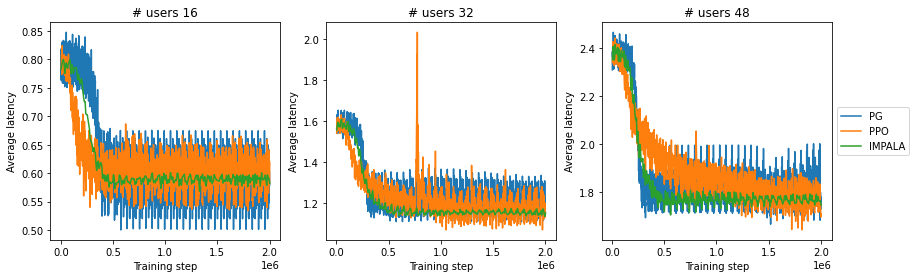

In [86]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for network_id, num_users, ax in zip([1, 5, 6], [16, 32, 48], axes):
    for label, dataframe in experiments[network_id].items():
        ax.plot(
            dataframe['timesteps_total'],
            dataframe['custom_metrics/users_distances_mean'], label=label)
        ax.set_title('# users {}'.format(num_users))
for ax in axes.flat:
    ax.set(xlabel='Training step', ylabel='Average latency')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

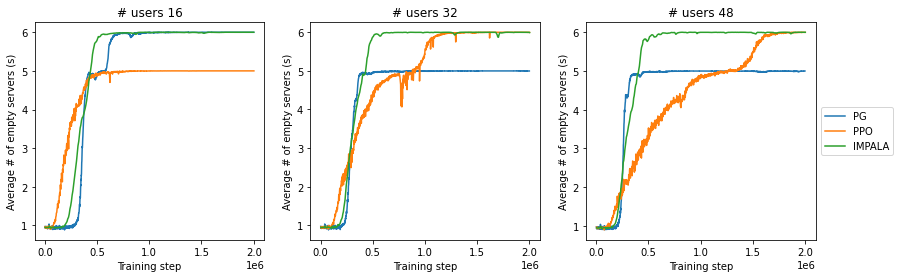

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for network_id, num_users, ax in zip([1, 5, 6], [16, 32, 48], axes):
    for label, dataframe in experiments[network_id].items():
        ax.plot(
            dataframe['timesteps_total'],
            dataframe['custom_metrics/num_consolidated_mean'], label=label)
        ax.set_title('# users {}'.format(num_users))
for ax in axes.flat:
    ax.set(xlabel='Training step', ylabel='Average # of empty servers (s)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


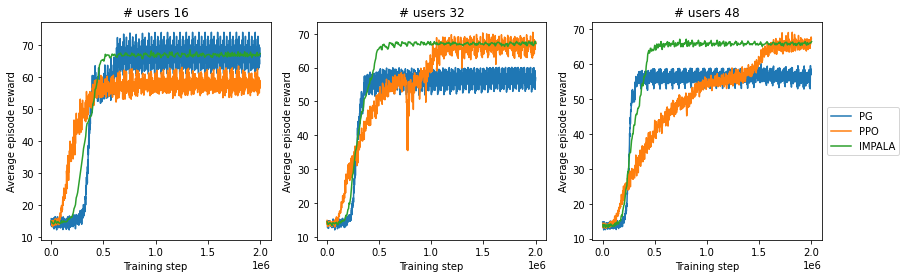

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for network_id, num_users, ax in zip([1, 5, 6], [16, 32, 48], axes):
    for label, dataframe in experiments[network_id].items():
        ax.plot(
            dataframe['timesteps_total'],
            dataframe['episode_reward_mean'], label=label)
        ax.set_title('# users {}'.format(num_users))
for ax in axes.flat:
    ax.set(xlabel='Training step', ylabel='Average episode reward')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [88]:
a= {1: {}, 5: {}, 6: {}}
1 in a

True

episp